In [123]:
import pandas as pd
import numpy as np

In [124]:
# FILENAME = 'DROPPEDWITHATTRIBUTESNULL_recompiled_features_updated_yunet_pixels_bg_pixels_fixlbbox.csv'
FILENAME = 'ths-st3 compiled dataset.csv'
df = pd.read_csv(FILENAME)

In [125]:
def calculate_bin_ranges(dataset, num_bins):
    sorted_dataset = np.sort(dataset)  # Sort the dataset in ascending order
    data_min = sorted_dataset.min()  # Minimum value in the dataset
    data_max = sorted_dataset.max()  # Maximum value in the dataset

    bin_width = (data_max - data_min) / num_bins  # Calculate the width of each bin

    bin_ranges = []  # List to store the ranges of each bin

    for i in range(num_bins):
        bin_min = data_min + (bin_width * i)  # Calculate the minimum value of the bin
        bin_max = bin_min + bin_width  # Calculate the maximum value of the bin
        bin_ranges.append((bin_min, bin_max))  # Add the range to the bin_ranges list

    return bin_ranges

In [126]:
# df['bbox_area'] = np.log(df['w'] * df['h'])
df['bbox_area'] = df['w'] * df['h']

In [127]:
bin_range = calculate_bin_ranges(df['bbox_area'], 4)

<AxesSubplot:>

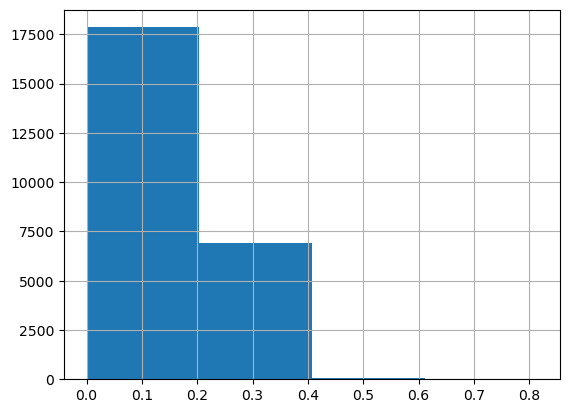

In [128]:
df['bbox_area'].hist(bins=4)

In [144]:
index = 3 #TODO: select an index (0 - small, 1-medium, large-2)

In [145]:
cut_csv = df[(df['bbox_area'] >= bin_range[index][0]) & (df['bbox_area'] <= bin_range[index][1])]

In [146]:
cut_csv.to_csv('large_2.csv', index=False)